In [1]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl (276.6 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl (24.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.23.4-cp310-abi3-win_amd64.whl (422 kB)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Using cached grpcio-1.56.2-cp311-cp311-win_amd64.whl (4.2 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
                                              0.0/1.7 MB 

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\A\\anaconda3\\Lib\\site-packages\\clang\\native\\libclang.dll'
Consider using the `--user` option or check the permissions.



In [2]:
!pip install --upgrade pip
!pip install --upgrade setuptools


ERROR: To modify pip, please run the following command:
C:\Users\A\anaconda3\python.exe -m pip install --upgrade pip



                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB 330.3 kB/s eta 0:00:07
                                              0.0/2.1 MB 330.3 kB/s eta 0:00:07
     -                                        0.1/2.1 MB 438.9 kB/s eta 0:00:05
     --                                       0.1/2.1 MB 547.6 kB/s eta 0:00:04
     --                                       0.1/2.1 MB 610.6 kB/s eta 0:00:04
     ---                                      0.2/2.1 MB 695.5 kB/s eta 0:00:03
     ---                                      0.2/2.1 MB 695.5 kB/s eta 0:00:03
     ---                                      0.2/2.1 MB 695.5 kB/s eta 0:00:03
     ---                                      0.2/2.1 MB 695.5 kB/s eta 0:00:03
     ---                                      0.2/2.1 MB 695.5 kB/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.29.0 which is incompatible.


In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.13.0


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [53]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [54]:
# Normalize the pixel values to range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [55]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(y_train.shape))

The shape of X is: (60000, 28, 28)
The shape of y is: (60000,)


In [56]:
print ('The first element of y is: ', y_train[0])
print ('The last element of y is: ', y_train[-1])

The first element of y is:  5
The last element of y is:  8


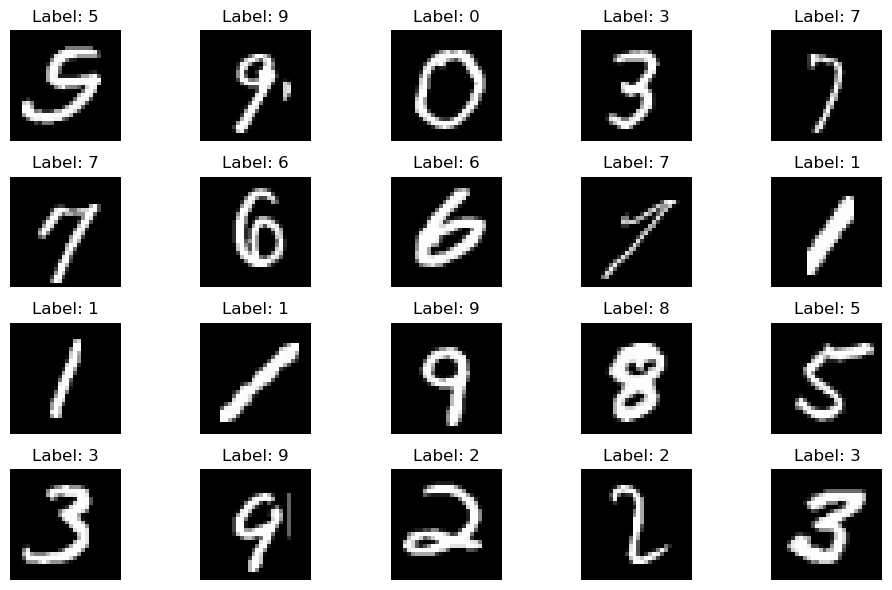

In [57]:
# Visualize 20 random images from the train set
import matplotlib.pyplot as plt
num_images_to_visualize = 20
random_indices = np.random.choice(len(X_train), num_images_to_visualize, replace=False)

plt.figure(figsize=(10, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(f'Label: {y_train[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [58]:
# check the image size
image_size = X_train[0].shape
print("Image size:", image_size)

Image size: (28, 28)


In [59]:
# Flatten the input images
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [65]:
# using Keras Sequential model and Dense Layer with a ReLU activation to construct the three layer network
tf.random.set_seed(1234)  # for consistent results
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(25, activation='relu', name="L1"),
    Dense(15, activation='relu', name="L2"),
    Dense(10, activation='linear', name="L3"),
], name="my_model")


In [66]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                19625     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 20175 (78.81 KB)
Trainable params: 20175 (78.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
[layer1, layer2, layer3] = model.layers

In [68]:
# Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [69]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,y_train,
    epochs=40
)

Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3995
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1972
Epoch 3/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1580
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1372
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1219
Epoch 6/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1107
Epoch 7/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1020
Epoch 8/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0954
Epoch 9/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0892
Epoch 10/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0864
Epoch 11/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0811
Epoch 12/40
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0779
E

In [76]:
# Evaluate the model on the test dataset
test_loss = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.2086
Test Loss: 0.20855122804641724


In [77]:
# Pick 10 random indices from the test dataset and see its results evaluate by the model we have trained
random_indices = np.random.choice(len(X_test), 10, replace=False)

In [78]:
images = X_test[random_indices]
actual_labels = y_test[random_indices]

In [79]:
# Use the model to predict the probabilities for each image that we have selected from the test data
predicted_probs = model.predict(images)

1/1 [==============================] - 0s 131ms/step


In [80]:
# Get the predicted labels for each image
predicted_labels = np.argmax(predicted_probs, axis=1)

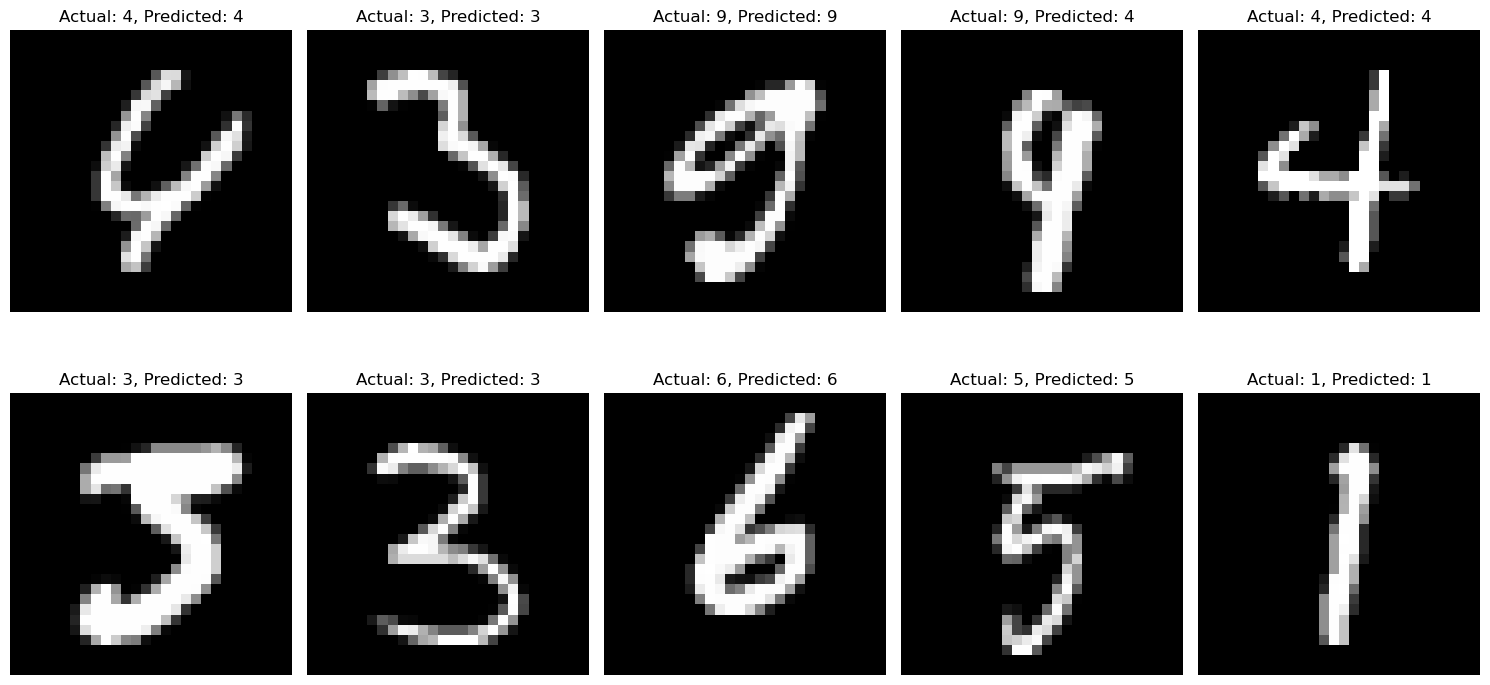

In [81]:
# Show the images and their corresponding actual and predicted labels
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()